In [1]:
import json, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display, Markdown

In [2]:
CONFIDENCE = {
    "Strongly Agree": 1.0,
    "Agree": 0.8,
    "Slightly Agree": 0.6,
    "Slightly Disagree": 0.4,
    "Disagree": 0.2,
    "Strongly Disagree": 0.0
}

## Performance: N = 80, ACC = 0.887, F1 macro = 0.887, kappa = 0.774

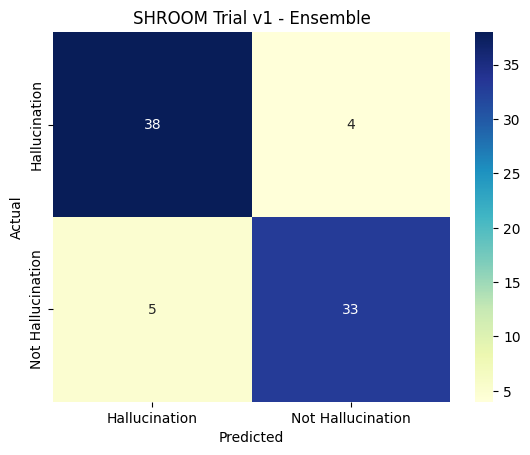

## False negatives

hyp,ref,src,tgt,model,task,labels,label,p(Hallucination),rationale,predicted,predicted_p
That is a safer way to travel.,either,A lot safer that way.,Because it’s safer.,tuner007/pegasus_paraphrase,PG,"['Hallucination', 'Hallucination', 'Hallucination']",Hallucination,1.000000,"The output is not a hallucination. It accurately paraphrases the input, maintaining the same meaning and context. The input ""A lot safer that way"" is rephrased in the output as ""That is a safer way to travel."" The output does add the context of travel, but it can be reasonably inferred from the input, which discusses safety in a certain 'way' or method, often associated with a form of action or movement. Therefore, the output is correct and accurate.",Not Hallucination,0.000000
I have nothing to do with it.,either,J'en ai rien à secouer.,I don't give a shit about it.,,MT,"['Hallucination', 'Not Hallucination', 'Hallucination']",Hallucination,0.666667,"The output is not a hallucination. However, it is not entirely accurate. The French phrase ""J'en ai rien à secouer"" is a colloquial expression that translates more closely to ""I don't give a damn"" or ""I don't give a shit,"" as indicated in the target. The output ""I have nothing to do with it"" is not a direct translation and misses the dismissive and indifferent tone of the original phrase. Therefore, while the output is not a hallucination, it is not an accurate translation.",Not Hallucination,0.000000
In this case we see the results all the time.,either,Dans ce métier on voit tout de suite les résultats.,In this activity one immediately sees the result.,,MT,"['Hallucination', 'Hallucination', 'Hallucination']",Hallucination,1.000000,"The output is not a hallucination. Although it does not match the target translation exactly, it still accurately conveys the main idea of the input. The input sentence in French translates to ""In this job, we immediately see the results."" The output, ""In this case we see the results all the time,"" is a slightly different interpretation but still maintains the core meaning of seeing results quickly or immediately in a certain situation or job. Therefore, it is not a hallucination as it does not introduce new information or misinterpret the input.",Not Hallucination,0.000000
Do you have a cryon?,either,As-tu un crayon ?,Have you got a pencil?,,MT,"['Hallucination', 'Hallucination', 'Hallucination']",Hallucination,1.000000,"The output is not a hallucination. The output is a correct translation of the input, except for a minor spelling error. The word ""cryon"" should be ""pencil"". Despite this error, the output still conveys the same meaning as the input and the target. Therefore, it is not a hallucination, which would involve the output being incorrect, off point, or containing information not present in the input.",Not Hallucination,0.000000


## False positives

hyp,ref,src,tgt,model,task,labels,label,p(Hallucination),rationale,predicted,predicted_p
(nautical) A halyard.,tgt,"Haul away , keeping strain on both parts of the halyard so that the pigstick remains vertical as it goes up and does n't foul the spreaders .",(nautical) A staff that carries a flag or pennant above the mast of a sailboat.,,DM,"['Hallucination', 'Not Hallucination', 'Not Hallucination']",Not Hallucination,0.333333,"The output is a hallucination. The term to be defined in the input is 'pigstick', but the output provides a definition for 'halyard'. The target definition confirms that a 'pigstick' is a staff that carries a flag or pennant above the mast of a sailboat, not a halyard. Therefore, the output is incorrect and off point.",Hallucination,1.000000
"(Australia, New Zealand, colloquial) A hatfish.",tgt,"Noah did n't realize when he stayed on the job - he was then about 600 years old and built the ark and drove the animals in two by two , the hatfish and the kangaroo — — he did n't realize he was laying the foundation for an occupation for old men in New York , several years later .",(colloquial) Synonym of halibut,,DM,"['Hallucination', 'Not Hallucination', 'Not Hallucination']",Not Hallucination,0.333333,"The output is a hallucination. The language model was supposed to generate a definition for the term ""hatfish"", and the target definition provided is ""Synonym of halibut"". However, the output generated by the model is ""(Australia, New Zealand, colloquial) A hatfish"", which does not provide a definition for the term. Instead, it simply repeats the term and adds a geographical context, which is not present in the input. Therefore, the output is incorrect and does not match the target.",Hallucination,1.000000
(transitive) To cook (something) in a frying pan.,tgt,Innawong et al . ( 2006 ) conducted experiments to study the effect of using nitrogen gas on the quality of fried chicken nuggets during pressure frying in terms of moisture retention and reduction in fat [ … ],Cooked in a deep fryer or pressure fryer or the like after being coated (breaded) in batter; compare deep-fried.,,DM,"['Not Hallucination', 'Not Hallucination', 'Not Hallucination']",Not Hallucination,0.000000,"The output is a hallucination. The term to be defined is 'fried' and while the output does provide a definition for 'fried', it is not specific to the context provided in the input. The input is specifically about 'fried chicken nuggets' and the target definition accurately describes the process of frying in this context, including the coating or breading of the chicken nuggets before frying. The output definition, however, is a more general definition of frying and does not include these specific details. Therefore, the output is not accurate in the context of the input.",Hallucination,0.800000
That’s not happening at the moment.,either,That’s not happening.,That isn’t gonna happen.,tuner007/pegasus_paraphrase,PG,"['Hallucination', 'Not Hallucination', 'Not Hallucination']",Not Hallucination,0.333333,"The output is a hallucination. The input statement is ""That’s not happening,"" and the model's output is ""That’s not happening at the moment."" The addition of ""at the moment"" changes the meaning of the sentence. The input statement is absolute, indicating that something will not happen at all. However, the output suggests that the event could happen in the future, just not right now. This additional information cannot be inferred from the input, making the output a hallucination.",Hallucination,1.000000
Do you love her?,either,Est-ce que tu l'aimes ?,Do you love him?,,MT,"['Not Hallucination', 'Hallucination', 'Not Hallucination']",Not Hallucination,0.333333,"The output is a hallucination. The input is in French and it translates to ""Do you love him?"" in English. However, the model incorrectly translated it to ""Do you love her?"" The gender of the person being referred to in the sentence has been changed, which is not accurate 

In [3]:
datapoints = json.load(open('results_trial-v1_likert.json', 'r'))
datapoints = [ dp for dp in datapoints if "predicted" in dp ]
results = pd.DataFrame.from_records(datapoints)
results["predicted_p"] = results["predicted"].apply(lambda val: CONFIDENCE[val])
results["predicted"] = results["predicted"].apply(lambda val: "Hallucination" if val in ["Strongly Agree", "Agree", "Slightly Agree"] else "Not Hallucination")
cm = pycm.ConfusionMatrix(results["label"].tolist(), results["predicted"].tolist(), digit=2, classes=[ 'Hallucination', 'Not Hallucination' ])

display(Markdown(f'## Performance: N = {cm.POP["Hallucination"]}, ACC = {cm.ACC["Hallucination"]:.3f}, F1 macro = {cm.F1_Macro:.3f}, kappa = {cm.Kappa:.3f}'))
df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
ax.set_title("SHROOM Trial v1 - Ensemble")
ax.set(xlabel='Predicted', ylabel='Actual')
plt.show()

def display_errors(results):
    fns = results[((results["label"] == 'Hallucination') & (results["predicted"] == 'Not Hallucination'))]
    if len(fns) > 0:
        fns_styler = fns.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False negatives'))
        display(fns_styler)
    fps = results[((results["label"] == 'Not Hallucination') & (results["predicted"] == 'Hallucination'))]
    if len(fps) > 0:
        fps_styler = fps.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False positives'))
        display(fps_styler)

display_errors(results)

In [4]:
results

,hyp,ref,src,tgt,model,task,labels,label,p(Hallucination),rationale,predicted,predicted_p
0,"A district of Kowloon, China.",tgt,The City <define> Chiuchow </define> is Kowloo...,The Chaoshan region where the Teochew dialect ...,,DM,"[Hallucination, Hallucination, Hallucination]",Hallucination,1.000000,The output is a hallucination. The term to be ...,Hallucination,1.0
1,(Wicca) A witchdoctor.,tgt,"“ I went to see the witchdoctor , the <define>...",(South Africa) A traditional tribal diviner or...,,DM,"[Hallucination, Hallucination, Not Hallucination]",Hallucination,0.666667,"The output is a hallucination. The term ""igqir...",Hallucination,1.0
2,(nautical) A halyard.,tgt,"Haul away , keeping strain on both parts of th...",(nautical) A staff that carries a flag or penn...,,DM,"[Hallucination, Not Hallucination, Not Halluci...",Not Hallucination,0.333333,The output is a hallucination. The term to be ...,Hallucination,1.0
3,The quality of being rational.,tgt,And what difference is there between the credi...,(archaic) The quality or state of being rational.,,DM,"[Not Hallucination, Not Hallucination, Not Hal...",Not Hallucination,0.000000,The output is not a hallucination. The term to...,Not Hallucination,0.0
4,(uncountable) The study of trees.,tgt,It is now generally supposed that the forbidde...,The worship of trees.,,DM,"[Hallucination, Hallucination, Hallucination]",Hallucination,1.000000,"The output is a hallucination. The term ""arbor...",Hallucination,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,I can't do it alone.,either,Je ne peux le faire seule. Il vous faut m'aider.,I can't do it alone. You have to help me.,,MT,"[Not Hallucination, Not Hallucination, Halluci...",Not Hallucination,0.333333,"The output is not a hallucination, but it is i...",Not Hallucination,0.0
76,He lost what he received from his father.,either,Il a perdu ce qu'il a reçu de son père.,He wasted that which he had received from his ...,,MT,"[Not Hallucination, Not Hallucination, Not Hal...",Not Hallucination,0.000000,The output is not a hallucination. The output ...,Not Hallucination,0.0
77,We've discovered a lot of news.,either,Nous avons découvert une grande nouveauté.,We have discovered a great novelty.,,MT,"[Hallucination, Not Hallucination, Hallucination]",Hallucination,0.666667,The output can be considered a hallucination. ...,Hallucination,1.0
78,Why is everyone okay?,either,Pourquoi est-ce que tout le monde rigole ?,Why is everyone laughing?,,MT,"[Hallucination, Hallucination, Hallucination]",Hallucination,1.000000,The output is a hallucination. The input in Fr...,Hallucination,1.0


In [5]:
results[["p(Hallucination)", "predicted_p"]].corr(method='spearman',numeric_only=True)

,p(Hallucination),predicted_p
p(Hallucination),1.000000,0.794779
predicted_p,0.794779,1.000000
